In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import torch
import torch.autograd as autograd
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time

In [2]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
train_dataset = datasets.MNIST(root='./data/',
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)
test_dataset = datasets.MNIST(root='./data/',
                           train=False, 
                           transform=transforms.ToTensor())

In [3]:
torch.manual_seed(3435)
train_img = torch.stack([d[0] for d in train_dataset])
train_label = torch.LongTensor([d[1] for d in train_dataset])
test_img = torch.stack([d[0] for d in test_dataset])
test_label = torch.LongTensor([d[1] for d in test_dataset])

In [4]:
val_img = train_img[-10000:].clone()
val_label = train_label[-10000:].clone()
full_img = train_img.clone()
full_label = train_label.clone()
train_img = train_img[:-10000]
train_label = train_label[:-10000]

In [5]:
train = torch.utils.data.TensorDataset(train_img, train_label)
val = torch.utils.data.TensorDataset(val_img, val_label)
full = torch.utils.data.TensorDataset(full_img, full_label)
test = torch.utils.data.TensorDataset(test_img, test_label)
BATCH_SIZE = 100
train_loader = torch.utils.data.DataLoader(train, batch_size=BATCH_SIZE, shuffle=True)
val_loader = torch.utils.data.DataLoader(val, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=BATCH_SIZE, shuffle=True)
full_loader = torch.utils.data.DataLoader(full, batch_size=BATCH_SIZE, shuffle=True)

In [6]:
#basic fully connected generator
class FC_Generator(nn.Module):
    
    def __init__(self, noise_dim, hidden_dim1, hidden_dim2, output_dim):
        
        super(FC_Generator, self).__init__()
        
        self.noise_dim = noise_dim
        self.hidden_dim1 = hidden_dim1
        self.l1 = nn.Linear(noise_dim, hidden_dim1*7*7)
        self.c1 = nn.ConvTranspose2d(hidden_dim1,hidden_dim2,2,stride=2)
        self.c2 = nn.ConvTranspose2d(hidden_dim2,1,2,stride=2)
    
    #only take in number of needed initializations
    def forward(self, b_size):
        
        noise = torch.stack([torch.normal(torch.zeros(self.noise_dim), torch.ones(self.noise_dim)) for i in range(b_size)])
        noise = Variable(noise.cuda())
        
        f1 = self.l1(noise)
        f1 = f1.view(f1.size()[0],self.hidden_dim1,7,7)
        f2 = F.relu(f1)
        f3 = self.c1(f2)
        f4 = F.relu(f3)
        f5 = self.c2(f4)
        f6 = F.sigmoid(f5)
        return f6

In [7]:
#basic fully connected 1 layer discriminator
class FC_Discriminator(nn.Module):
    
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
        
        super(FC_Discriminator, self).__init__()
        
        self.input_dim = input_dim
        self.c1 = nn.Conv2d(1, hidden_dim1, 3)
        self.p1 = nn.MaxPool2d(2)
        self.c2 = nn.Conv2d(hidden_dim1, hidden_dim2, 3)
        self.l1 = nn.Linear(int(hidden_dim2*((input_dim/2.0 - 3.)**2.0)), output_dim)
        
        
    def forward(self, input_img):
        
        f1 = self.c1(input_img)
        f2 = self.p1(f1)
        f3 = F.relu(f2)
        f4 = self.c2(f3)
        f5 = F.relu(f4)
        
        #reshape f5 for final linear layer
        f5 = f5.view(f5.size()[0],-1)
        f6 = self.l1(f5)
        f7 = F.sigmoid(f6)
        
        return f7

Epoch 0: Gen CE loss: 1.66 Disc CE loss 0.30 Time elapsed: 8.97 Disc acc: 0.003
Generated Images Sample:


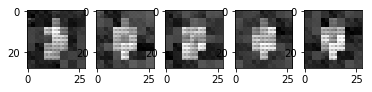

Epoch 10: Gen CE loss: 3.45 Disc CE loss 0.10 Time elapsed: 8.10 Disc acc: 0.004
Generated Images Sample:


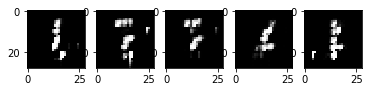

Epoch 20: Gen CE loss: 1.81 Disc CE loss 0.29 Time elapsed: 8.05 Disc acc: 0.001
Generated Images Sample:


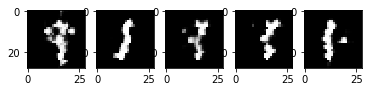

Epoch 30: Gen CE loss: 1.84 Disc CE loss 0.28 Time elapsed: 8.02 Disc acc: 0.002
Generated Images Sample:


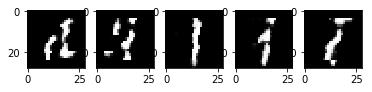

Epoch 40: Gen CE loss: 1.94 Disc CE loss 0.25 Time elapsed: 8.10 Disc acc: 0.000
Generated Images Sample:


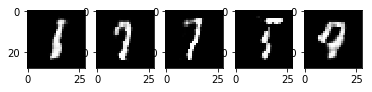

Epoch 50: Gen CE loss: 2.01 Disc CE loss 0.25 Time elapsed: 8.04 Disc acc: 0.002
Generated Images Sample:


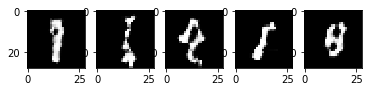

Epoch 60: Gen CE loss: 1.92 Disc CE loss 0.29 Time elapsed: 8.06 Disc acc: 0.004
Generated Images Sample:


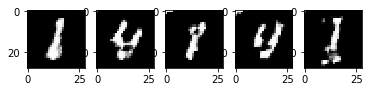

Epoch 70: Gen CE loss: 2.11 Disc CE loss 0.24 Time elapsed: 8.14 Disc acc: 0.001
Generated Images Sample:


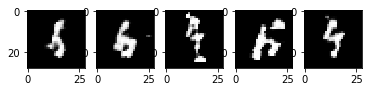

Epoch 80: Gen CE loss: 2.18 Disc CE loss 0.24 Time elapsed: 8.02 Disc acc: 0.003
Generated Images Sample:


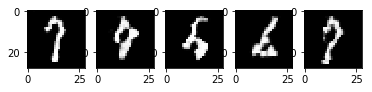

Epoch 90: Gen CE loss: 2.25 Disc CE loss 0.22 Time elapsed: 8.04 Disc acc: 0.001
Generated Images Sample:


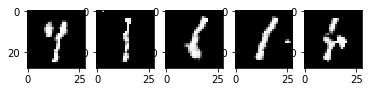

Epoch 100: Gen CE loss: 2.31 Disc CE loss 0.20 Time elapsed: 8.02 Disc acc: 0.003
Generated Images Sample:


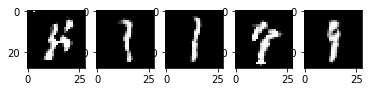

Epoch 110: Gen CE loss: 2.44 Disc CE loss 0.19 Time elapsed: 8.14 Disc acc: 0.000
Generated Images Sample:


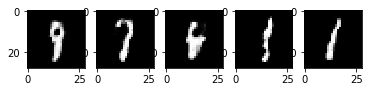

Epoch 120: Gen CE loss: 2.45 Disc CE loss 0.19 Time elapsed: 8.06 Disc acc: 0.003
Generated Images Sample:


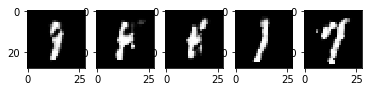

Epoch 130: Gen CE loss: 2.54 Disc CE loss 0.17 Time elapsed: 8.15 Disc acc: 0.001
Generated Images Sample:


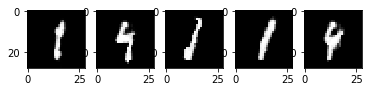

Epoch 140: Gen CE loss: 2.61 Disc CE loss 0.17 Time elapsed: 8.04 Disc acc: 0.002
Generated Images Sample:


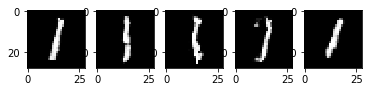

Epoch 150: Gen CE loss: 2.70 Disc CE loss 0.16 Time elapsed: 8.01 Disc acc: 0.004
Generated Images Sample:


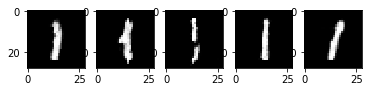

Epoch 160: Gen CE loss: 2.73 Disc CE loss 0.15 Time elapsed: 8.04 Disc acc: 0.001
Generated Images Sample:


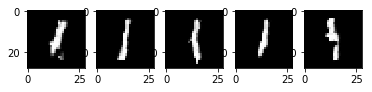

Epoch 170: Gen CE loss: 2.82 Disc CE loss 0.15 Time elapsed: 8.08 Disc acc: 0.003
Generated Images Sample:


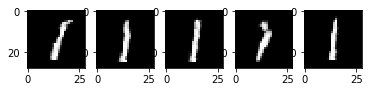

Epoch 180: Gen CE loss: 2.83 Disc CE loss 0.15 Time elapsed: 8.07 Disc acc: 0.003
Generated Images Sample:


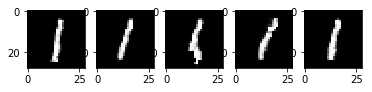

Epoch 190: Gen CE loss: 2.89 Disc CE loss 0.13 Time elapsed: 8.02 Disc acc: 0.001
Generated Images Sample:


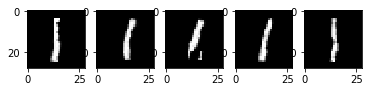

Epoch 200: Gen CE loss: 2.90 Disc CE loss 0.13 Time elapsed: 9.36 Disc acc: 0.003
Generated Images Sample:


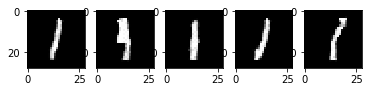

Epoch 210: Gen CE loss: 2.91 Disc CE loss 0.12 Time elapsed: 10.36 Disc acc: 0.001
Generated Images Sample:


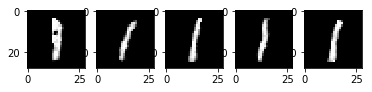

Epoch 220: Gen CE loss: 2.97 Disc CE loss 0.11 Time elapsed: 10.36 Disc acc: 0.004
Generated Images Sample:


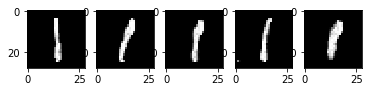

Epoch 230: Gen CE loss: 3.11 Disc CE loss 0.11 Time elapsed: 9.12 Disc acc: 0.004
Generated Images Sample:


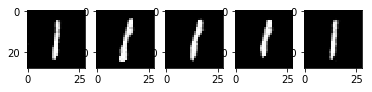

Epoch 240: Gen CE loss: 3.17 Disc CE loss 0.12 Time elapsed: 10.32 Disc acc: 0.003
Generated Images Sample:


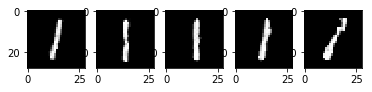

Epoch 250: Gen CE loss: 3.19 Disc CE loss 0.11 Time elapsed: 10.35 Disc acc: 0.004
Generated Images Sample:


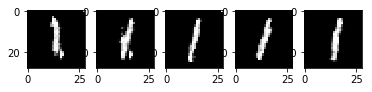

Epoch 260: Gen CE loss: 3.38 Disc CE loss 0.11 Time elapsed: 9.56 Disc acc: 0.001
Generated Images Sample:


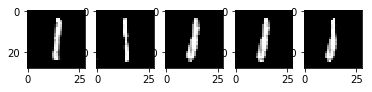

Epoch 270: Gen CE loss: 3.40 Disc CE loss 0.11 Time elapsed: 8.06 Disc acc: 0.000
Generated Images Sample:


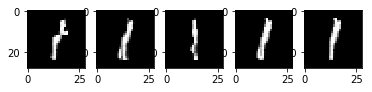

Epoch 280: Gen CE loss: 3.31 Disc CE loss 0.10 Time elapsed: 8.07 Disc acc: 0.002
Generated Images Sample:


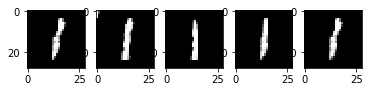

Epoch 290: Gen CE loss: 3.36 Disc CE loss 0.08 Time elapsed: 8.02 Disc acc: 0.002
Generated Images Sample:


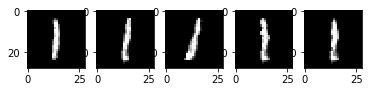

Epoch 300: Gen CE loss: 3.67 Disc CE loss 0.09 Time elapsed: 8.04 Disc acc: 0.002
Generated Images Sample:


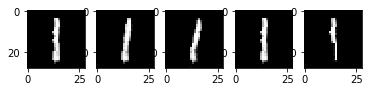

Epoch 310: Gen CE loss: 3.53 Disc CE loss 0.09 Time elapsed: 8.08 Disc acc: 0.001
Generated Images Sample:


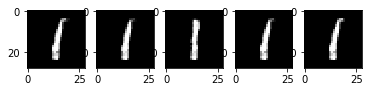

Epoch 320: Gen CE loss: 4.00 Disc CE loss 0.07 Time elapsed: 8.06 Disc acc: 0.000
Generated Images Sample:


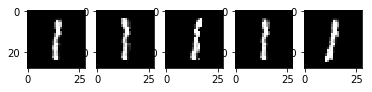

Epoch 330: Gen CE loss: 4.03 Disc CE loss 0.05 Time elapsed: 8.08 Disc acc: 0.001
Generated Images Sample:


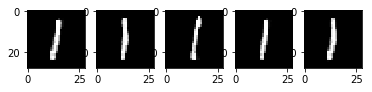

Epoch 340: Gen CE loss: 3.79 Disc CE loss 0.11 Time elapsed: 8.06 Disc acc: 0.000
Generated Images Sample:


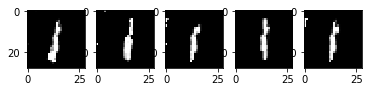

Epoch 350: Gen CE loss: 5.27 Disc CE loss 0.04 Time elapsed: 8.08 Disc acc: 0.001
Generated Images Sample:


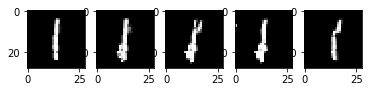

Epoch 360: Gen CE loss: 3.74 Disc CE loss 0.09 Time elapsed: 8.09 Disc acc: 0.001
Generated Images Sample:


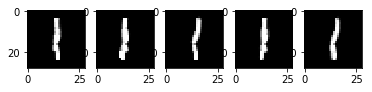

Epoch 370: Gen CE loss: 3.59 Disc CE loss 0.11 Time elapsed: 8.04 Disc acc: 0.000
Generated Images Sample:


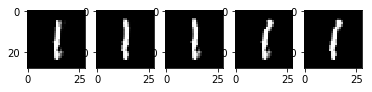

KeyboardInterrupt: 

In [8]:
saved_model = None
def train_GAN(models = None, epochs = 500, learning_rate = 0.0001, disc_losses = [], gen_losses = [], accs = []):
    
    if models:
        discr = models[0]
        gen = models[1]
        
        gen_optim = models[3]
        discr_optim = models[2]
        
    else:
        discr = FC_Discriminator(28, 8, 4, 1).cuda()
        gen = FC_Generator(20, 8, 4, 28*28).cuda()
        gen_optim = torch.optim.Adam(gen.parameters(),lr=learning_rate*3)
        discr_optim = torch.optim.Adam(discr.parameters(),lr=learning_rate)
    
    d_loss = nn.BCELoss(size_average=False)
    
    total_exs = len(full_img)
    
    for epoch in range(epochs):
        
        batches = 0
        exs = 0
        total_gen_loss = 0
        total_disc_loss = 0
        correct = 0
        start_time = time.time()
        
        for img, _ in full_loader:
            
            batches += 1
            
            #get number of examples. could be uneven at end
            exs = img.size()[0]
            
            #images
            x_real = Variable(img).cuda()
            x_fake = gen(exs)
            
            
            #labels
            y_real = Variable(torch.ones(exs)).cuda()
            y_fake = Variable(torch.zeros(exs)).cuda()
            
            y_hat_real = discr(x_real)
            y_hat_fake = discr(x_fake)
            real_loss = d_loss(y_hat_real.squeeze(),y_real)
            fake_loss = d_loss(y_hat_fake.squeeze(),y_fake)
            correct += torch.sum(y_hat_fake.lt(0.5))
            
            #step for discriminator
            disc_loss = real_loss + fake_loss
            total_disc_loss += disc_loss
            discr.zero_grad()
            disc_loss.backward()
            discr_optim.step()
            
            #new images
            x_fake2 = gen(exs)
            y_hat_fake2 = discr(x_fake2)
            
            #step for generator
            gen_loss = d_loss(y_hat_fake2.squeeze(), y_real)
            total_gen_loss += gen_loss
            discr.zero_grad()
            gen.zero_grad()
            gen_loss.backward()
            gen_optim.step()
        
        total_gen_loss /= float(total_exs)
        total_disc_loss /= float(total_exs*2)
        acc = float(correct) / float(total_exs)
        
        disc_losses += [total_disc_loss]
        gen_losses += [total_gen_loss]
        accs += [acc]
        
        if epoch % 10 == 0:
            delta = time.time()-start_time

            print("Epoch %d: Gen CE loss: %.2f Disc CE loss %.2f Time elapsed: %.2f Disc acc: %.3f" % (epoch, total_gen_loss, total_disc_loss, delta, acc))
            print("Generated Images Sample:")

            #generate and print 5 sample images
            z_ = gen(5)
            plt.figure()
            for i, image in enumerate(z_.data):
                plt.subplot(1,5,i+1)
                plt.imshow(image.view(28,28),cmap='gray')
            plt.show()
            
            
            
        saved_model = (discr, gen, discr_optim, gen_optim)
        
    return (discr, gen, discr_optim, gen_optim)
            
my_gen_losses = [] 
my_disc_losses = []
my_accs = []
my_model = train_GAN(gen_losses = my_gen_losses, disc_losses= my_disc_losses, accs=my_accs)

In [ ]:
torch.save(saved_model[0].state_dict(), "./models/ConvG")

In [14]:
mgl = [i.data[0] for i in my_gen_losses]
mpl = [j.data[0] for j in my_disc_losses]

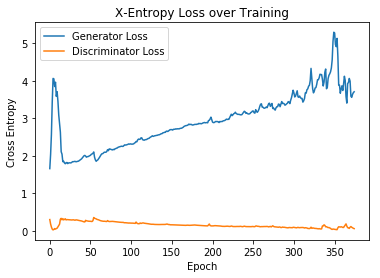

In [33]:
plt.plot(mgl)
plt.plot(mpl)
plt.title("X-Entropy Loss over Training")
plt.xlabel("Epoch")
plt.ylabel("Cross Entropy")
plt.legend(["Generator Loss", "Discriminator Loss"])

In [31]:
l=nn.BCELoss(size_average=True)
l(torch.randn(2,requires_grad=True),torch.FloatTensor([1,1]))

TypeError: torch.randn received an invalid combination of arguments - got (int, requires_grad=bool), but expected one of:
 * (int ... size)
      didn't match because some of the keywords were incorrect: requires_grad
 * (torch.Size size)
 * (torch.Generator generator, int ... size)
      didn't match because some of the keywords were incorrect: requires_grad
 * (torch.Generator generator, torch.Size size)
      didn't match because some of the keywords were incorrect: requires_grad
